In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('employee_attrition.csv')

In [3]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Encode target column
le = LabelEncoder()
df['Attrition_numerical'] = le.fit_transform(df['Attrition'])  # Yes=1, No=0

# Encode other categorical features using get_dummies
categorical_cols = ['Department','JobRole','Gender','MaritalStatus','EducationField']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [4]:
# Define Features (X) and Target (y)
X = df_encoded.drop(['Attrition','Attrition_numerical','EmployeeNumber'], axis=1)
y = df_encoded['Attrition_numerical']


In [9]:
# Encode categorical columns properly
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Exclude target column if it's in the list
categorical_cols.remove('Attrition')

# Get dummy variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Encode target
df_encoded['Attrition_numerical'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [12]:
X = df_encoded.drop(['Attrition', 'Attrition_numerical', 'EmployeeNumber'], axis=1, errors='ignore')
y = df_encoded['Attrition_numerical']


In [13]:
# Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


C:\Users\yogit\Downloads\anacondaDownload\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [15]:
# Predict & Evaluate
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))


Accuracy: 0.8673469387755102
Confusion Matrix:
 [[248   7]
 [ 32   7]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.50      0.18      0.26        39

    accuracy                           0.87       294
   macro avg       0.69      0.58      0.60       294
weighted avg       0.83      0.87      0.84       294



In [16]:
# Identify Important Features

feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print(feature_importance)


                              Feature  Coefficient
45                       OverTime_Yes     0.391925
23            YearsSinceLastPromotion     0.268181
44               MaritalStatus_Single     0.231767
12                 NumCompaniesWorked     0.229529
21                     YearsAtCompany     0.165419
25   BusinessTravel_Travel_Frequently     0.137217
28                   Department_Sales     0.130645
42       JobRole_Sales Representative     0.083835
30           EducationField_Marketing     0.054182
33    EducationField_Technical Degree     0.052927
36      JobRole_Laboratory Technician     0.051942
34                        Gender_Male     0.048655
41            JobRole_Sales Executive     0.044067
16                      StandardHours     0.030777
3                           Education     0.028407
14                  PerformanceRating     0.015424
35            JobRole_Human Resources     0.012457
2                    DistanceFromHome     0.011454
13                  PercentSala

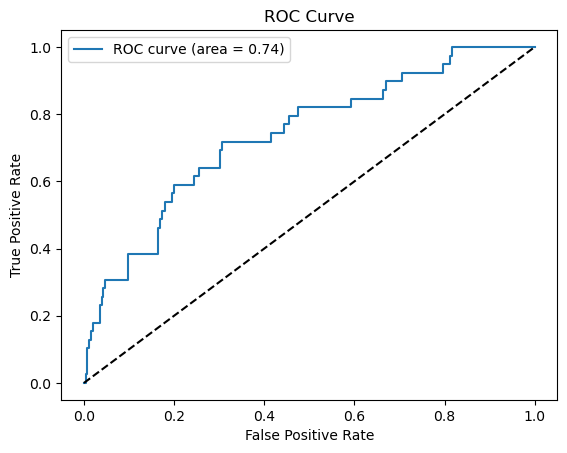

In [17]:
# ROC curve to show model performance

from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
